# FARM-Production

In [86]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt

In [88]:
df = pd.read_csv("farm_production_dataset.csv")

In [90]:
df.rename(columns={"REF_DATE":"Year","GEO":"Province",
                  "Average farm price (dollars per tonne)":"Average farm price $/T",
                  "Average yield (kilograms per hectare)":"Average yield kg/ha",
                  "Production (metric tonnes)":"Production T",
                  "Seeded area (acres)":"Seeded area ac",
                  "Seeded area (hectares)":"Seeded area ha",
                  "Total farm value (dollars)":"Total farm value $"}, inplace = True)
print(df.info())
print(df.head(5))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10273 entries, 0 to 10272
Data columns (total 9 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Year                    10273 non-null  int64  
 1   Province                10273 non-null  object 
 2   Type of crop            10272 non-null  object 
 3   Average farm price $/T  10243 non-null  float64
 4   Average yield kg/ha     10246 non-null  float64
 5   Production T            10245 non-null  float64
 6   Seeded area ac          9873 non-null   float64
 7   Seeded area ha          9847 non-null   float64
 8   Total farm value $      10273 non-null  int64  
dtypes: float64(5), int64(2), object(2)
memory usage: 722.4+ KB
None
   Year Province Type of crop  Average farm price $/T  Average yield kg/ha  \
0  1908       AB       Barley                   15.00               1585.0   
1  1908       AB     Flaxseed                   29.00                950.0   
2  190

In [92]:
df.describe()

,Year,Average farm price $/T,Average yield kg/ha,Production T,Seeded area ac,Seeded area ha,Total farm value $
count,10273.000000,10243.000000,10246.000000,1.024500e+04,9.873000e+03,9.847000e+03,1.027300e+04
mean,1947.661053,59.633078,3647.442319,1.010887e+06,1.310067e+06,5.316231e+05,5.490084e+04
std,22.204519,90.920549,8068.854966,3.044681e+06,4.881387e+06,1.978043e+06,2.502413e+05
min,1908.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,1929.000000,21.000000,1055.000000,8.300000e+03,1.050000e+04,4.350000e+03,3.690000e+02
50%,1948.000000,43.000000,1485.000000,7.195000e+04,8.300000e+04,3.400000e+04,3.006000e+03
75%,1967.000000,76.000000,2363.750000,5.480000e+05,5.831000e+05,2.389000e+05,1.954100e+04
max,1984.000000,6663.300000,460305.000000,1.336790e+08,3.172035e+08,1.283890e+08,4.654194e+06


In [94]:
df.isnull().sum()

Year                        0
Province                    0
Type of crop                1
Average farm price $/T     30
Average yield kg/ha        27
Production T               28
Seeded area ac            400
Seeded area ha            426
Total farm value $          0
dtype: int64

In [96]:
df[df.isnull().any(axis=1)]

,Year,Province,Type of crop,Average farm price $/T,Average yield kg/ha,Production T,Seeded area ac,Seeded area ha,Total farm value $
68,1908,ON,"Wheat, winter remaining",33.0,1585.0,430000.0,NaN,NaN,14060
170,1909,ON,"Wheat, winter remaining",37.0,1630.0,383000.0,NaN,NaN,14255
284,1910,ON,"Wheat, winter remaining",32.0,1580.0,486000.0,NaN,NaN,15362
404,1911,ON,"Wheat, winter remaining",32.0,1410.0,476000.0,NaN,NaN,15215
524,1912,ON,"Wheat, winter remaining",34.0,1390.0,413000.0,NaN,NaN,13950
...,...,...,...,...,...,...,...,...,...
10230,1984,PP,"Rye, fall remaining",96.0,1780.0,508000.0,NaN,NaN,48616
10236,1984,PP,"Wheat, winter remaining",156.0,1780.0,494300.0,NaN,NaN,77117
10251,1984,QU,"Rye, fall remaining",0.0,0.0,0.0,NaN,NaN,0
10265,1984,SK,"Rye, fall remaining",97.0,1470.0,203000.0,NaN,NaN,19691


In [98]:
df = df.dropna()
df.isnull().sum()

Year                      0
Province                  0
Type of crop              0
Average farm price $/T    0
Average yield kg/ha       0
Production T              0
Seeded area ac            0
Seeded area ha            0
Total farm value $        0
dtype: int64

In [100]:
df_resumen_total = df.groupby("Year")[["Production T","Seeded area ha","Total farm value $"]].sum()
print(df_resumen_total.head(5))


      Production T  Seeded area ha  Total farm value $
Year                                                  
1908    52499754.0      26454712.0              910003
1909    62395404.0      29642962.0             1181586
1910    49643450.0      30238450.0              840106
1911    73328000.0      35772750.0             1363764
1912    72058200.0      36625650.0             1257926


In [102]:
df_resumen_total_crop = df.groupby("Type of crop")[["Production T","Seeded area ha","Total farm value $"]].sum()
print(df_resumen_total_crop.head(5))

                                     Production T  Seeded area ha  \
Type of crop                                                        
Barley                               1.015372e+09     585685200.0   
Beans, all dry (white and coloured)  6.538700e+06       5198000.0   
Buckwheat                            1.708095e+07      14979000.0   
Canola (rapeseed)                    1.084066e+08     100983700.0   
Corn for grain                       1.985560e+08      41959160.0   

                                     Total farm value $  
Type of crop                                             
Barley                                         63042796  
Beans, all dry (white and coloured)             1354467  
Buckwheat                                        852279  
Canola (rapeseed)                              26121836  
Corn for grain                                 18250459  


In [104]:
import matplotlib.pyplot as plt

In [106]:
df

,Year,Province,Type of crop,Average farm price $/T,Average yield kg/ha,Production T,Seeded area ac,Seeded area ha,Total farm value $
0,1908,AB,Barley,15.00,1585.0,84000.0,129800.0,53000.0,1296
1,1908,AB,Flaxseed,29.00,950.0,1900.0,5900.0,2000.0,56
2,1908,AB,Oats,18.00,1675.0,352000.0,519400.0,210000.0,6316
3,1908,AB,"Rye, all",23.00,1665.0,5000.0,6500.0,3000.0,117
4,1908,AB,Sugar beets,0.55,18100.0,38100.0,5200.0,2100.0,208
...,...,...,...,...,...,...,...,...,...
10267,1984,SK,Sunflower seed,337.00,510.0,5400.0,26000.0,10500.0,1820
10268,1984,SK,Tame hay,78.00,2870.0,2087000.0,1800000.0,728000.0,162786
10269,1984,SK,"Wheat, all",176.00,1420.0,11485000.0,20000000.0,8094000.0,2026204
10270,1984,SK,"Wheat, durum",188.00,1200.0,1633000.0,3350000.0,1356000.0,307004


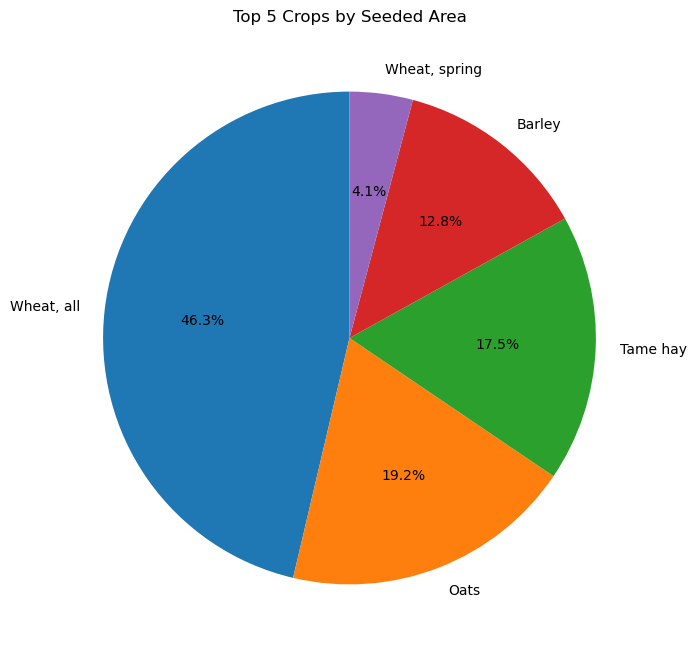

In [108]:
# Top 5 crops by total seeded area
top_crops = df.groupby('Type of crop')['Seeded area ha'].sum().sort_values(ascending=False).head(5)

# Pie chart for top crops
top_crops.plot(kind='pie', autopct='%1.1f%%', figsize=(8, 8), startangle=90)
plt.title('Top 5 Crops by Seeded Area')
plt.ylabel('')
plt.show()


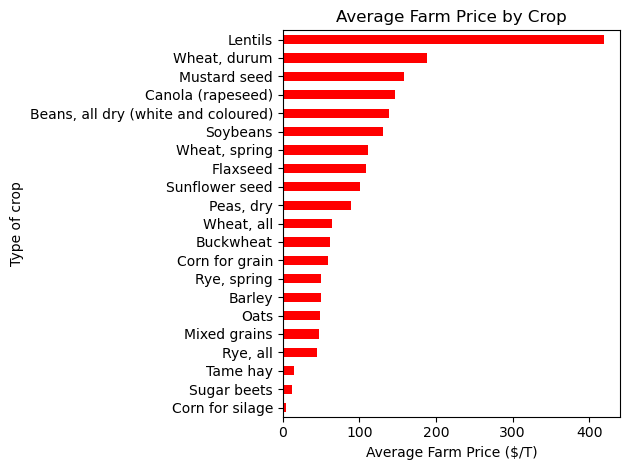

In [110]:
avg_price = df.groupby('Type of crop')['Average farm price $/T'].mean()
avg_price.sort_values().plot(kind='barh', color='red')
plt.xlabel('Average Farm Price ($/T)')
plt.title('Average Farm Price by Crop')
plt.tight_layout()
plt.show()

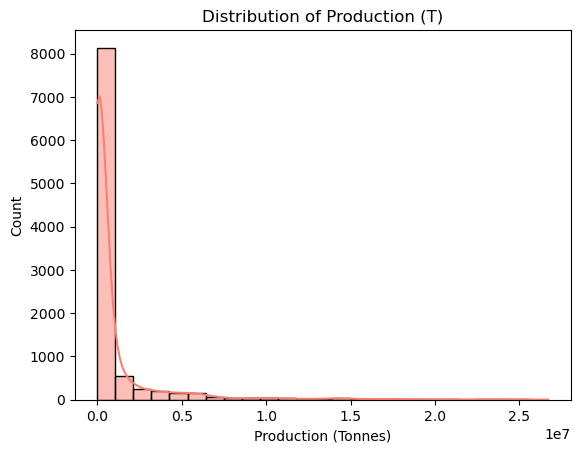

In [112]:
sns.histplot(df['Production T'], kde=True, bins=25, color='salmon')
plt.title('Distribution of Production (T)')
plt.xlabel('Production (Tonnes)')
plt.show()

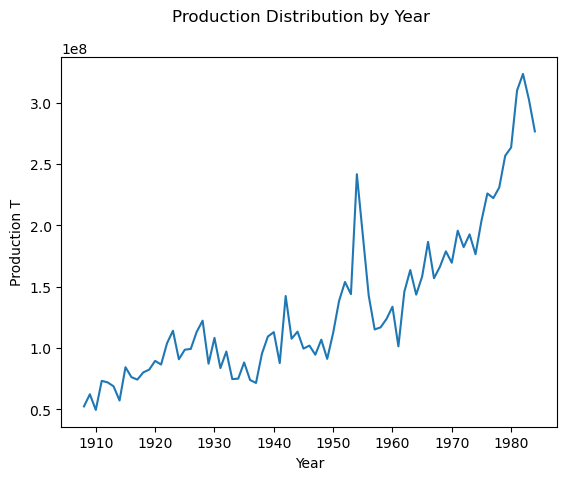

In [114]:
sns.lineplot(df, x='Year', y='Production T',errorbar=None, estimator=sum)
plt.suptitle('Production Distribution by Year')
plt.show()

In [83]:
import seaborn as sns